In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
#importing a csv into data frame ames_train & setting NA as a valid input (NOT null or blank)
ames_train = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\train.csv',
                         keep_default_na=False)

In [3]:
#replacing all blank (non NA) with 'noval' & save into file train02.csv
ames_train = ames_train.replace('', 'noval')
ames_train.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\train02.csv')

In [4]:
ames_train.head(10) #checking if NA / NaN & 'noval' exist.

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,noval,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500
5,138,535126040,20,RL,137,16492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,6,2010,WD,190000
6,2827,908186070,180,RM,35,3675,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,6,2006,New,140000
7,145,535154050,20,RL,noval,12160,Pave,NA,IR1,Lvl,...,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,1942,535353130,20,RL,noval,15783,Pave,NA,Reg,Lvl,...,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70,11606,Pave,NA,IR1,HLS,...,0,0,NA,NA,NA,0,9,2007,WD,135000


In [5]:
ames_train.iloc[:,:41].isin(['noval']).sum() #check 'noval' in each column

Id                  0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      330
Lot Area            0
Street              0
Alley               0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Heating             0
dtype: int64

In [6]:
ames_train.iloc[:,40:].isin(['noval']).sum() #check 'noval' in each column

Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu         0
Garage Type          0
Garage Yr Blt      114
Garage Finish        1
Garage Cars          1
Garage Area          1
Garage Qual          1
Garage Cond          1
Paved Drive          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Pool QC              0
Fence                0
Misc Feature         0
Misc Val             0
Mo Sold              0
Yr Sold              0
Sale Type            0
SalePrice            0
dtype: int64

### Clean up data.
#Lot Frontage = 330 missing values. Estimating Lot Frontage based on the likelihood based on Lot Area.
#Garage Yr Blt = 114 missing values. Fill with 0 for those with Garage Type = NA & Garage Area = 0.

In [7]:
#importing a csv modified file into data frame ames_train & setting NA as a valid input (NOT null or blank)
ames_train = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\train_modified.csv',
                        keep_default_na=False)
ames_train = ames_train.replace('', 'noval')

In [8]:
ames_train.iloc[:,:41].isin(['noval']).sum() #check 'noval' in each column

Id                 0
PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Alley              0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type      22
Mas Vnr Area      22
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          1
Bsmt Cond          1
Bsmt Exposure      4
BsmtFin Type 1     1
BsmtFin SF 1       1
BsmtFin Type 2     2
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
dtype: int64

In [9]:
ames_train.iloc[:,40:].isin(['noval']).sum() #check 'noval' in each column

Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     2
Bsmt Half Bath     2
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Pool QC            0
Fence              0
Misc Feature       0
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
dtype: int64

In [10]:
#removing blank / 'noval' rows in each column
ames_train = ames_train[~ames_train['Mas Vnr Type'].isin(['noval'])]
ames_train = ames_train[~ames_train['Bsmt Exposure'].isin(['noval'])]
ames_train = ames_train[~ames_train['BsmtFin Type 2'].isin(['noval'])]
ames_train = ames_train[~ames_train['Bsmt Full Bath'].isin(['noval'])]

ames_train.reset_index(drop=True, inplace=True)

ames_train.iloc[:,:41].isin(['noval']).sum() #check 'noval'

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Heating           0
dtype: int64

In [11]:
ames_train.iloc[:,40:].isin(['noval']).sum() #check 'noval'

Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      0
Garage Finish      0
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Pool QC            0
Fence              0
Misc Feature       0
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
SalePrice          0
dtype: int64

In [12]:
#Numerical predictors
ames_train_n = ames_train[['Lot Frontage','Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Mas Vnr Area',
                           'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
                           'Gr Liv Area','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr',
                           'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars','Garage Area',
                           'Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val',
                           'Mo Sold','Yr Sold','SalePrice']]
ames_train_n.tail()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
2018,79,11449,8,5,2007,2007,0,1011,0,873,...,0,276,0,0,0,0,0,1,2008,298751
2019,98,12342,4,5,1940,1950,0,262,0,599,...,158,0,0,0,0,0,0,3,2009,82500
2020,57,7558,6,6,1928,1950,0,0,0,896,...,0,0,0,0,0,0,0,3,2009,177000
2021,80,10400,4,5,1956,1956,0,155,750,295,...,0,189,140,0,0,0,0,11,2009,144000
2022,60,7500,7,5,1999,1999,0,0,0,994,...,140,60,0,0,0,0,0,6,2010,189000


In [13]:
ames_train_n = ames_train_n.astype('int64') #convert data frame into numerical type (integer)

In [14]:
ames_train_n.dtypes.head() #checking the types of data frame

Lot Frontage    int64
Lot Area        int64
Overall Qual    int64
Overall Cond    int64
Year Built      int64
dtype: object

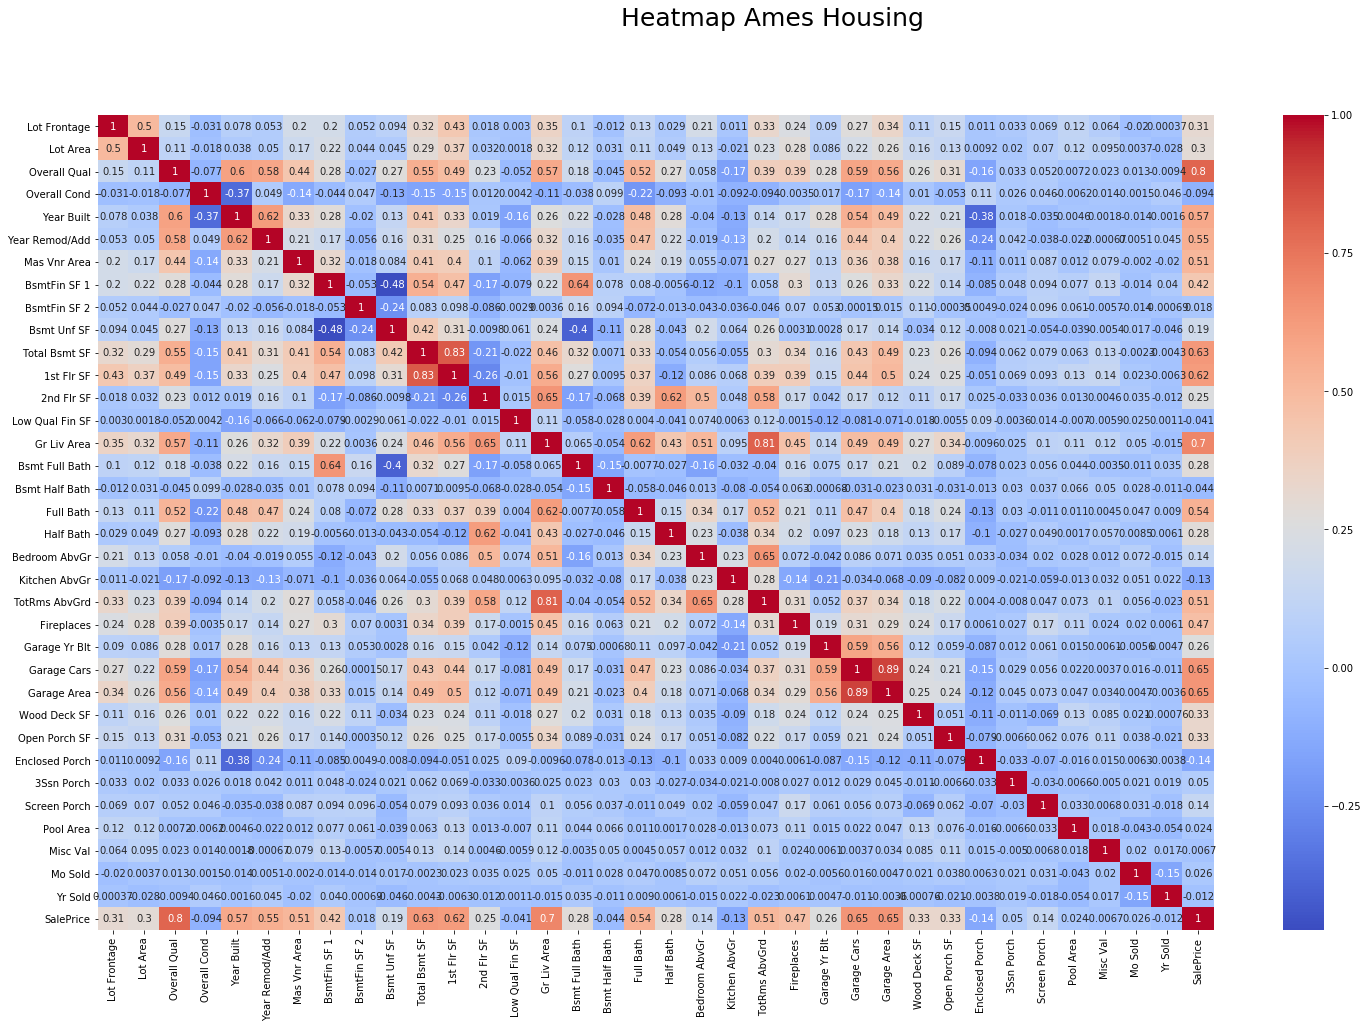

In [15]:
#plotting heatmap for numerical variables to determine potential predictors (based on the correlation with SalesPrice)
plt.figure(figsize=(25,15))
sns.heatmap(ames_train_n.corr(), annot=True, cmap='coolwarm')
plt.suptitle('Heatmap Ames Housing', fontsize=25);

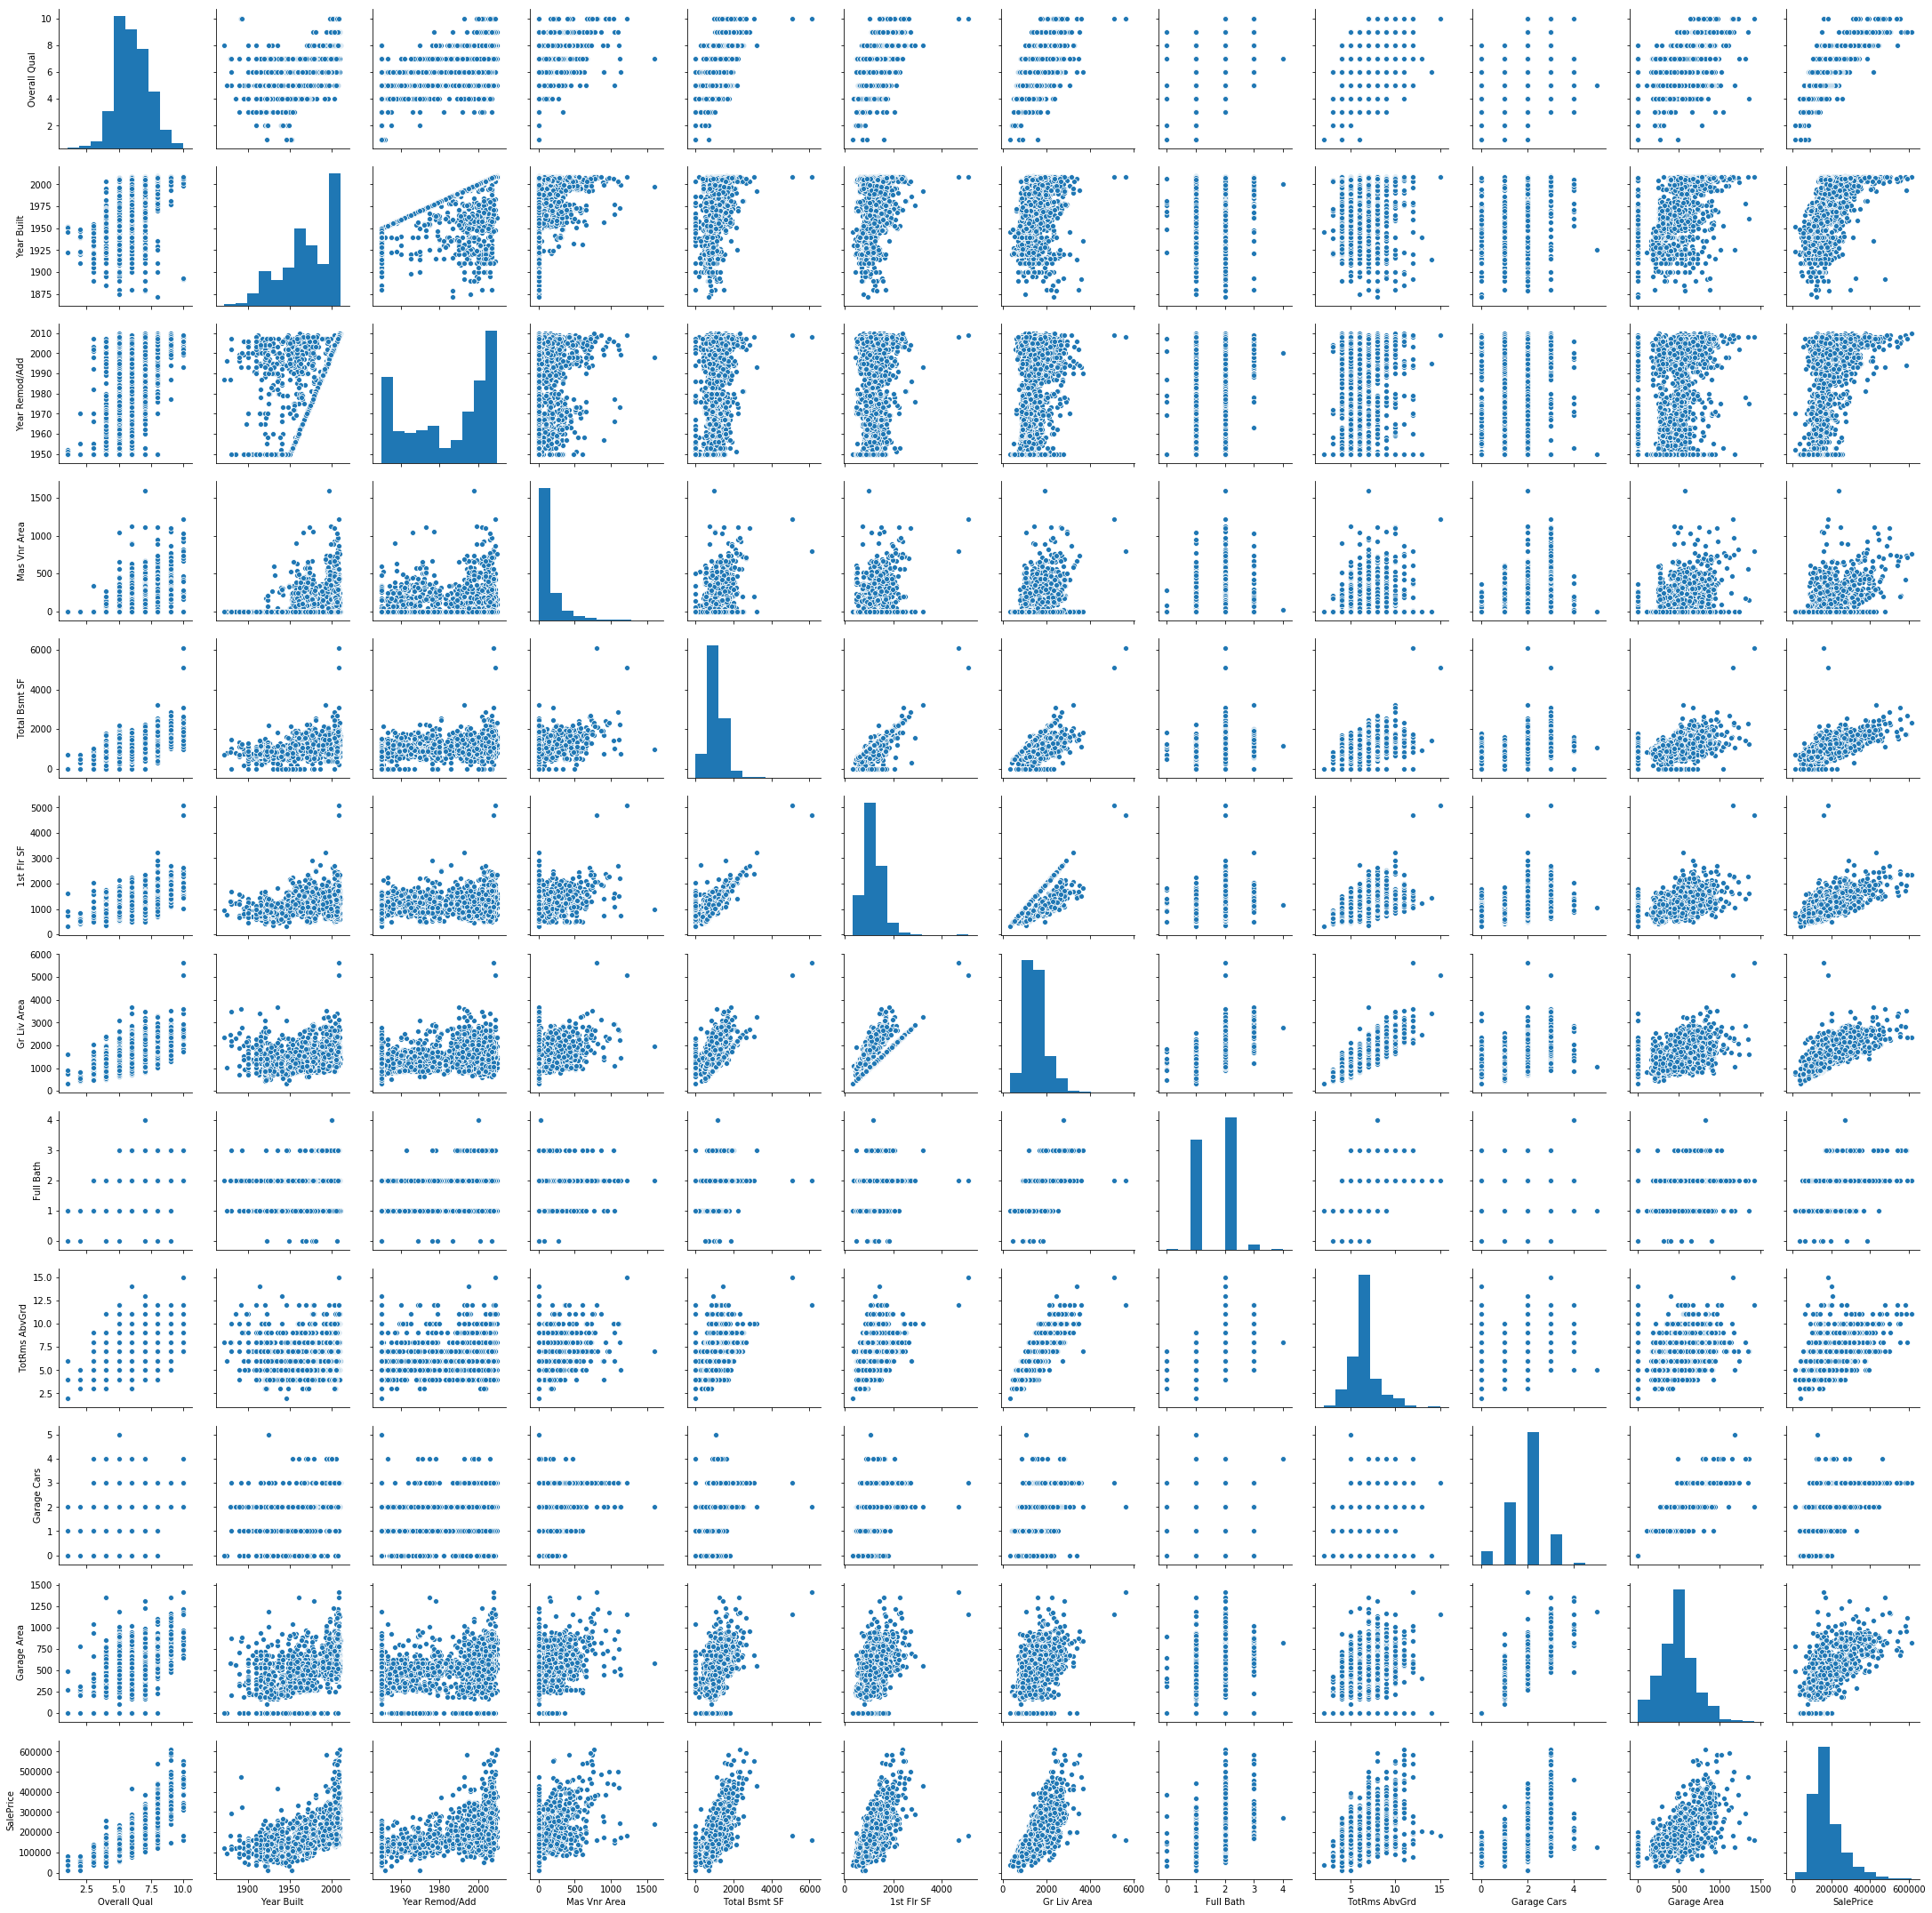

In [16]:
#Visualizing the potential predictors - 11 numerical predictors (correlartion >|0.5|).
sns.pairplot(ames_train_n[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
                          'Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area','SalePrice']]);

In [17]:
#From above scatter plot SalePrice vs Total Bsmt SF, there are 2 outliers.

#Locating the index of both outliers & remove them (1st outlier)
ames_train['Total Bsmt SF'] = ames_train['Total Bsmt SF'].astype('int64') #change type to int to ensure next code works.
ames_train['Total Bsmt SF'].idxmax() #index = 947
ames_train.drop(ames_train.index[[947]], inplace=True)
ames_train.reset_index(drop=True, inplace=True)

In [18]:
#Locating the index of both outliers & remove them (2nd outlier)
ames_train['Total Bsmt SF'].idxmax() #index = 1858
ames_train.drop(ames_train.index[[1858]], inplace=True)
ames_train.reset_index(drop=True, inplace=True)

In [19]:
ames_train_n = ames_train[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
                           'Gr Liv Area','Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area','SalePrice']]
ames_train_n = ames_train_n.astype('int64') #convert data frame into numeric type (integer)

In [20]:
ames_train_n.dtypes.head() #checking the types of data frame

Overall Qual      int64
Year Built        int64
Year Remod/Add    int64
Mas Vnr Area      int64
Total Bsmt SF     int64
dtype: object

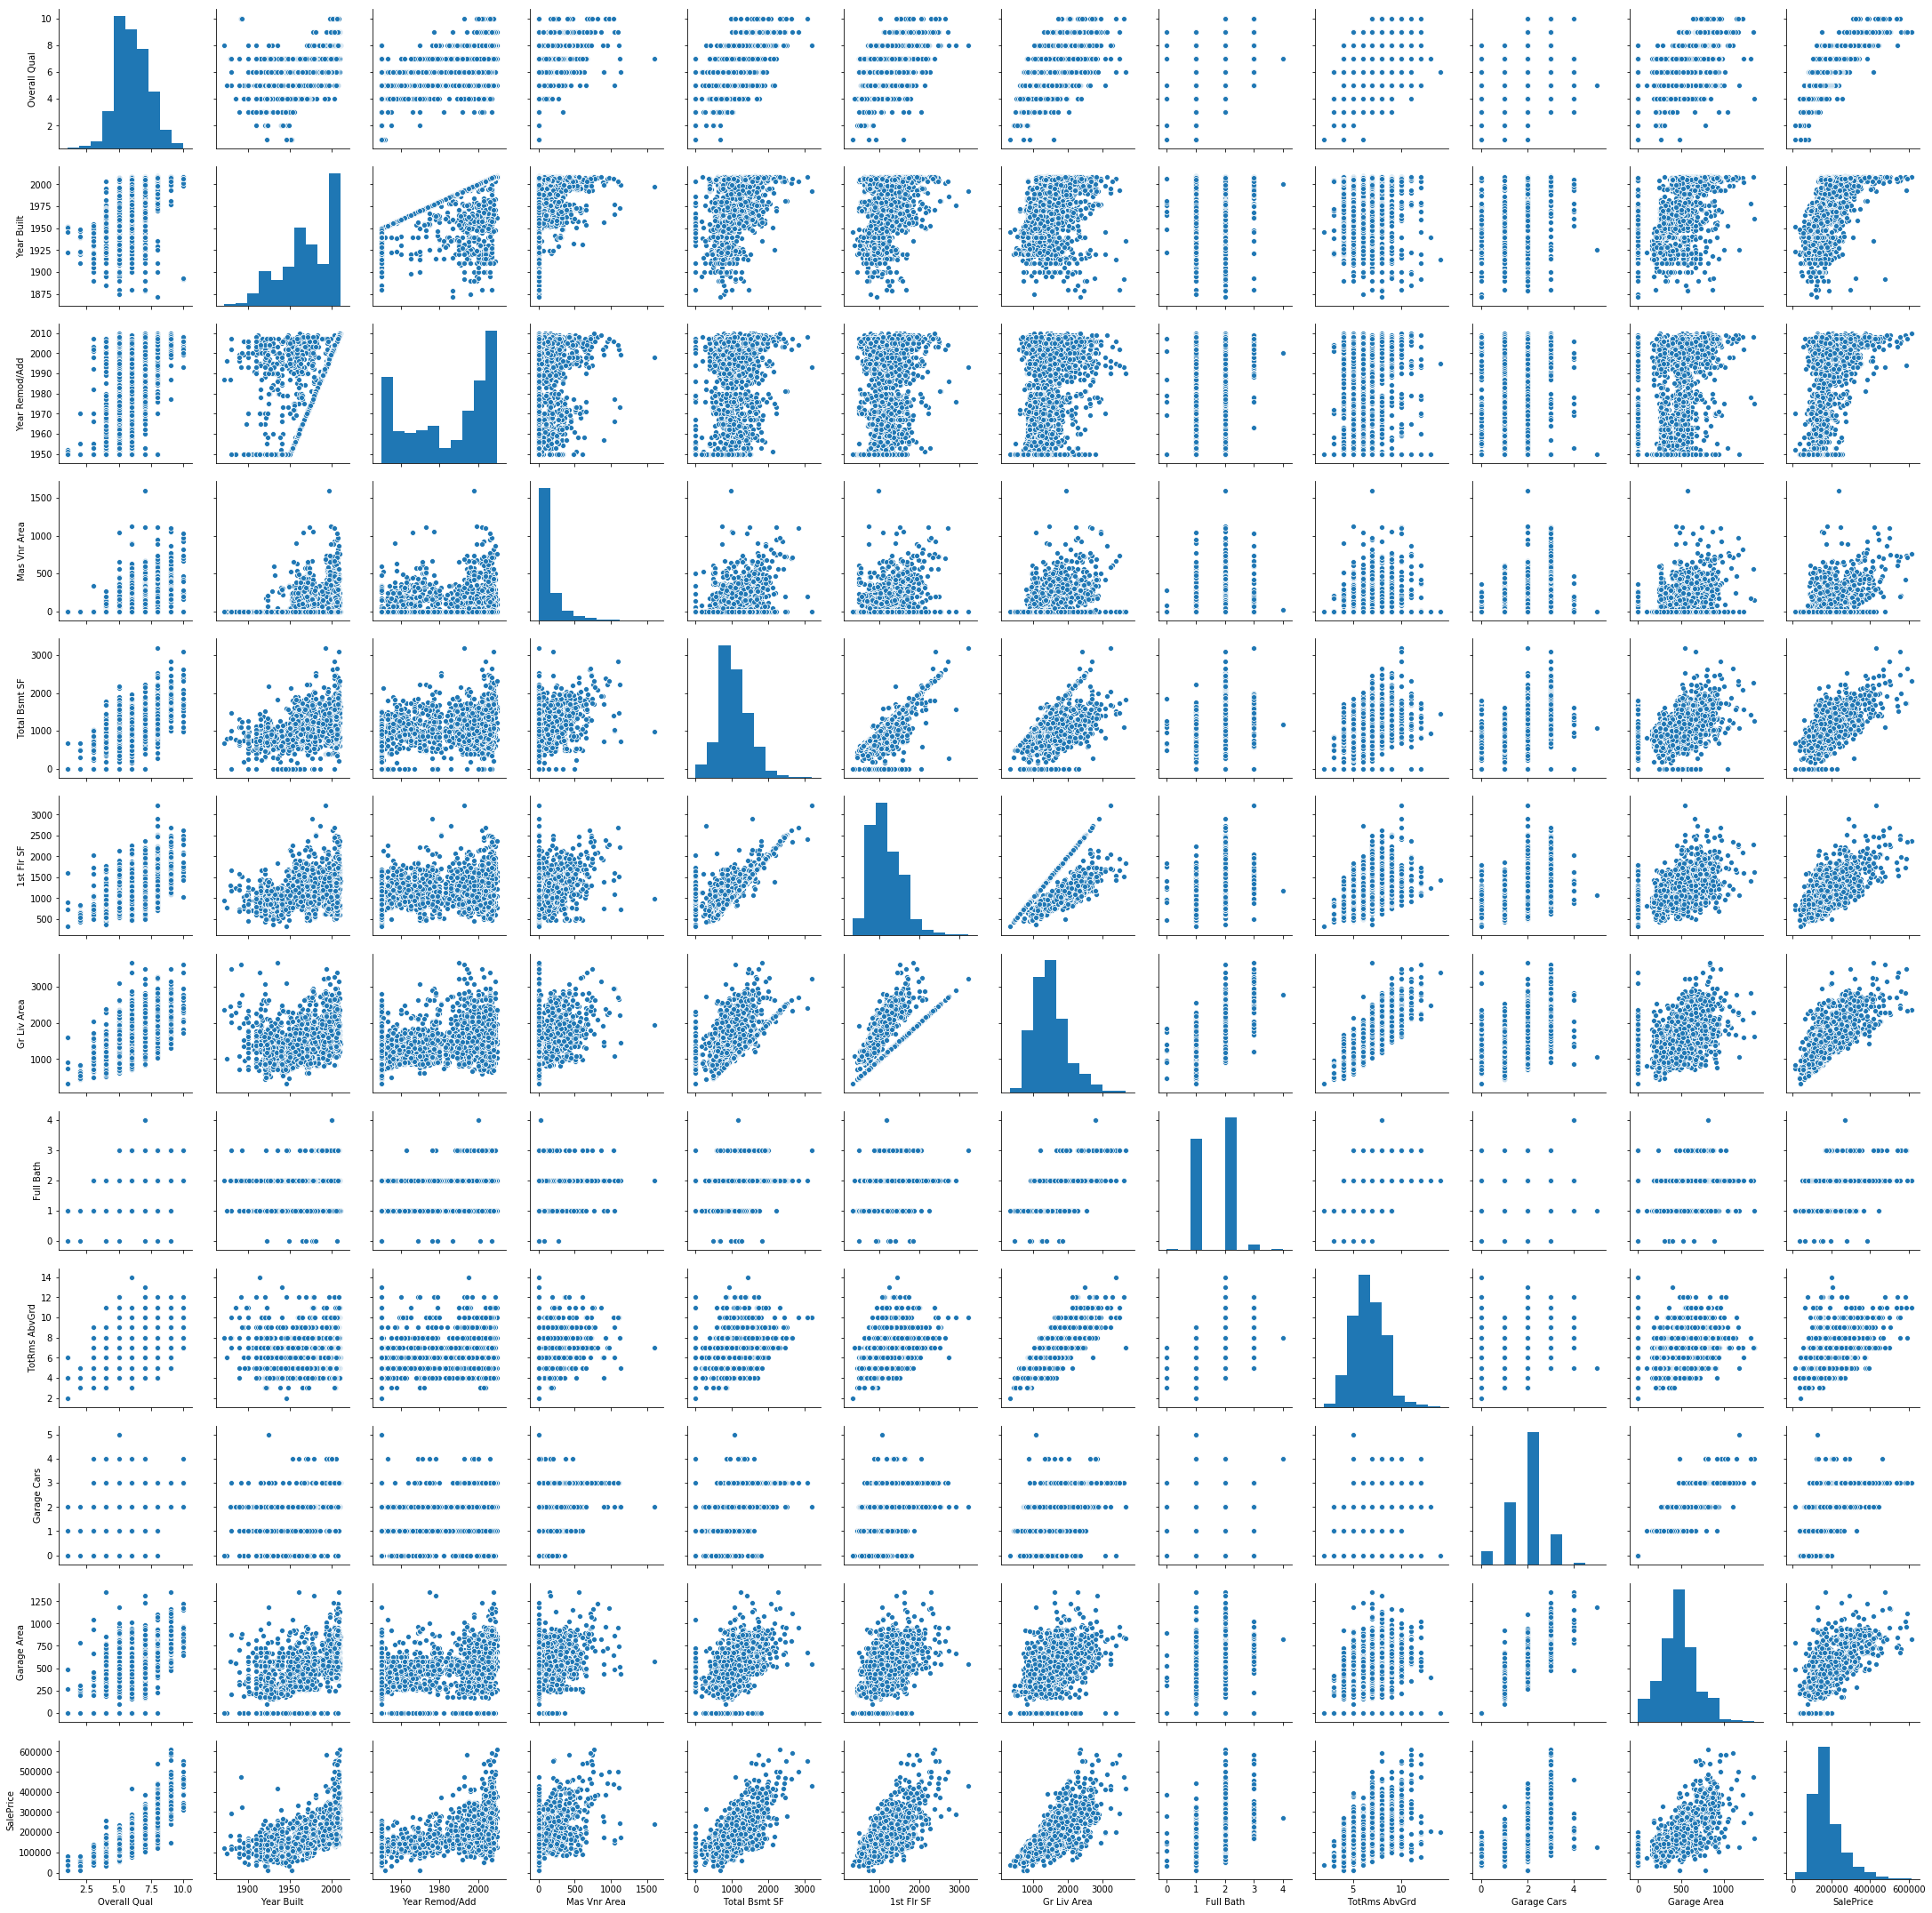

In [21]:
#Re-visualizing the potential predictors - 11 predictors (checking outliers - especially vs SalePrice).
sns.pairplot(ames_train_n[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
                           'Gr Liv Area','Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area','SalePrice']]);

In [22]:
#Categorical predictors (AFTER removing 2 outliers)
ames_train_c = ames_train[['MS SubClass','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config',
                           'Land Slope','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style',
                           'Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation',
                           'Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating','Heating QC',
                           'Central Air','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Type','Garage Finish',
                           'Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence','Misc Feature','Sale Type','SalePrice']]
ames_train_c.tail()

,MS SubClass,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,SalePrice
2016,20,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,298751
2017,30,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,82500
2018,50,RL,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,...,Detchd,Unf,Fa,Fa,Y,NA,NA,NA,WD,177000
2019,20,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,144000
2020,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,Fin,TA,TA,Y,NA,NA,NA,WD,189000


In [23]:
ames_train_c = ames_train_c.astype('object') #convert data frame into categorical type (object)

In [24]:
ames_train_c.dtypes.head() #checking the types of data frame

MS SubClass    object
MS Zoning      object
Street         object
Alley          object
Lot Shape      object
dtype: object

### Plotting heatmap for CATEGORICAL variables to determine potential predictors

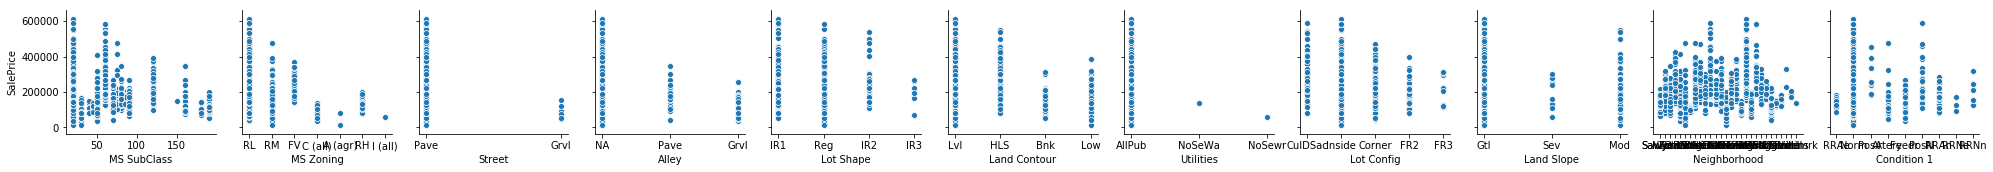

In [25]:
sns.pairplot(ames_train_c, x_vars=['MS SubClass','MS Zoning','Street','Alley','Lot Shape','Land Contour','Utilities','Lot Config',
                           'Land Slope','Neighborhood','Condition 1'], y_vars=['SalePrice']);

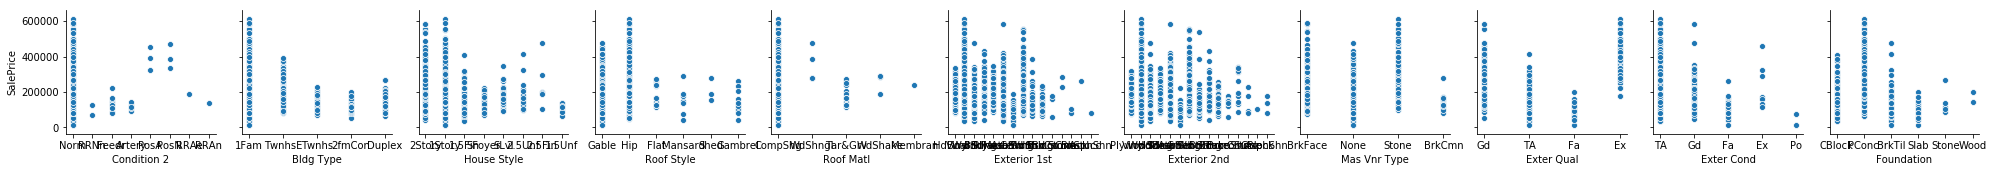

In [26]:
sns.pairplot(ames_train_c, x_vars=['Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st',
                                   'Exterior 2nd','Mas Vnr Type','Exter Qual','Exter Cond','Foundation'], y_vars=['SalePrice']);

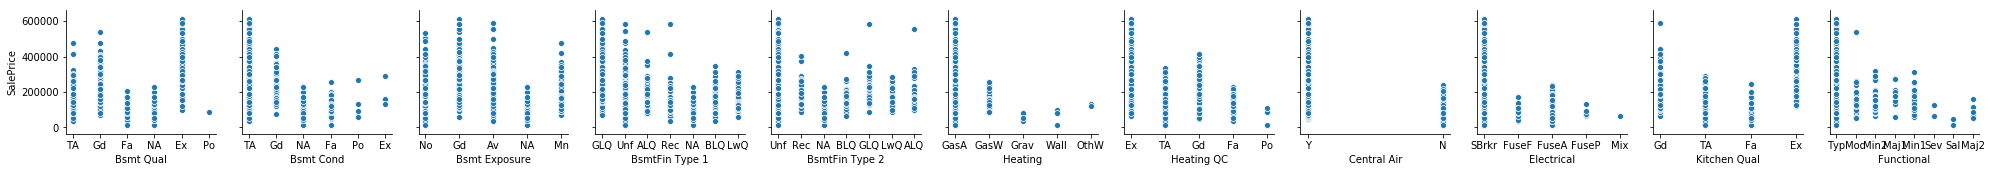

In [27]:
sns.pairplot(ames_train_c, x_vars=['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating',
                                   'Heating QC','Central Air','Electrical','Kitchen Qual','Functional'], y_vars=['SalePrice']);

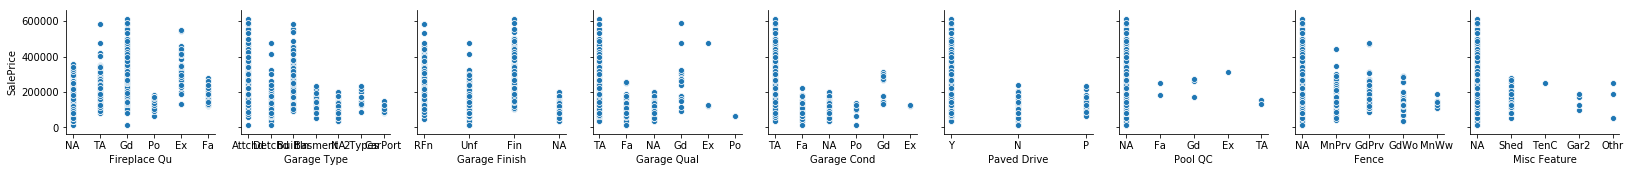

In [28]:
sns.pairplot(ames_train_c, x_vars=['Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC',
                                   'Fence','Misc Feature'], y_vars=['SalePrice']);

### Potentially 7 categorical predictors: ['Street', 'Alley', 'Land Contour', 'Bldg Type', 'Central Air', 'Kitchen Qual', 'Paved Drive']

In [29]:
#Assigning categorical predictors to Xc.
Xc = ames_train_c[['Street', 'Alley', 'Land Contour', 'Bldg Type', 'Central Air', 'Kitchen Qual', 'Paved Drive']]

In [30]:
dum_street = pd.get_dummies(Xc['Street'], prefix='Street')
dum_alley = pd.get_dummies(Xc['Alley'], prefix='Alley')
dum_landc = pd.get_dummies(Xc['Land Contour'], prefix='Land Contour')
dum_buildt = pd.get_dummies(Xc['Bldg Type'], prefix='Bldg Type')
dum_centrala = pd.get_dummies(Xc['Central Air'], prefix='Central Air')

In [31]:
dum_kitchenq = pd.get_dummies(Xc['Kitchen Qual'], prefix='Kitchen Qual')
#adding 1 column for dummy Po (poor) category
dum_kitchenq['Kitchen Qual_Po'] = 0
dum_kitchenq = dum_kitchenq[['Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_Po', 'Kitchen Qual_TA']]

In [32]:
dum_pavedd = pd.get_dummies(Xc['Paved Drive'], prefix='Paved Drive')

In [33]:
print(dum_street.shape)
print(dum_alley.shape)
print(dum_landc.shape)
print(dum_buildt.shape)
print(dum_centrala.shape)
print(dum_kitchenq.shape)
print(dum_pavedd.shape)

(2021, 2)
(2021, 3)
(2021, 4)
(2021, 5)
(2021, 2)
(2021, 5)
(2021, 3)


In [34]:
#Assigning dummy categorical predictors to Xcd.
Xcd = pd.concat([Xc,dum_street,dum_alley,dum_landc,dum_buildt,dum_centrala,dum_kitchenq,dum_pavedd], axis=1)

#delete the original categorical predictors
Xcd.drop(Xcd[['Street', 'Alley', 'Land Contour', 'Bldg Type', 'Central Air', 'Kitchen Qual', 'Paved Drive']],
         axis=1, inplace=True)

In [35]:
Xcd.tail()

,Street_Grvl,Street_Pave,Alley_Grvl,Alley_NA,Alley_Pave,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Bldg Type_1Fam,...,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y
2016,0,1,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
2017,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2018,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2019,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2020,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1


In [36]:
#determine X & y (at the moment, just including numerical predictors)
#(Combine X numerical & categorical)
Xn = ames_train_n.loc[:,['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
                        'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area']]
X = pd.concat([Xn, Xcd], axis=1)
X = X.values

y = ames_train_n.loc[:,['SalePrice']]
y = y.values

In [37]:
#checking the dimension of arrays
print(Xn.shape)
print(Xcd.shape)
print(X.shape)
print(y.shape)

(2021, 11)
(2021, 24)
(2021, 35)
(2021, 1)


In [38]:
#Scaling numerical predictors
Xss = StandardScaler().fit_transform(X)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
#Linear Regression Model without scaling & without training sets
lrm = LinearRegression().fit(X,y) 
print(lrm.intercept_)
print(lrm.coef_)
print(lrm.score(X,y))

[-1265391.74214364]
[[ 1.25841591e+04  3.20043967e+02  3.12507539e+02  3.91407858e+01
   2.52201475e+01  1.23038756e+01  5.79624592e+01 -5.32082720e+03
  -2.34081959e+03  5.94904877e+02  3.28635643e+01  9.83647711e+01
  -9.83647711e+01 -4.46311473e+02  4.47587554e+03 -4.02956407e+03
  -1.24116294e+04  1.48171254e+04  8.22245108e+03 -1.06279471e+04
   1.22758638e+04  8.76780283e+03 -8.47802385e+03 -8.90512824e+03
  -3.66051456e+03  1.16017199e+03 -1.16017199e+03  4.08351153e+04
  -1.47382070e+04 -1.09013901e+04  0.00000000e+00 -1.51955182e+04
   1.14560811e+03 -1.82874634e+03  6.83138227e+02]]
0.8763052451559121


In [40]:
#Linear Regression Model with scaling & without training sets
lrm_ss = LinearRegression().fit(Xss,y) 
print(lrm_ss.intercept_)
print(lrm_ss.coef_)
print(lrm_ss.score(Xss,y))

[180789.24433903]
[[ 1.77110104e+04  9.64103094e+03  6.63989986e+03  6.69934148e+03
   1.05889489e+04  4.60301047e+03  2.80866064e+04 -2.84609923e+03
  -3.65358759e+03  4.16216912e+02  7.14321573e+03 -2.07861106e+15
  -2.07861106e+15 -1.75213664e+17 -2.20176282e+17 -1.39494252e+17
   7.19720718e+15  7.45735395e+15  5.39172427e+15  1.12801573e+16
  -4.09844387e+16 -1.61715113e+16 -2.04969948e+16 -1.96903118e+16
  -2.91928531e+16 -1.54091640e+16 -1.54091640e+16 -3.86030997e+16
  -2.26168074e+16 -7.31566059e+16  0.00000000e+00 -7.49905135e+16
  -2.45023307e+15 -1.28590535e+15 -2.72156374e+15]]
0.8762511116912894


In [41]:
from sklearn.model_selection import KFold

In [42]:
#K-Fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=10)
kf.get_n_splits(Xss)
for train_index, test_index in kf.split(Xss):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lrm_train = LinearRegression().fit(X_train,y_train)
    print(lrm_train.coef_)
    print(lrm_train.intercept_)
    print(lrm_train.score(X_train,y_train))
    print(lrm_train.score(X_test,y_test))

TRAIN: [   0    2    3 ... 2018 2019 2020]
TEST: [   1   10   24   27   29   31   35   36   37   47   48   56   60   64
   67   68   69   74   79   85   94   95   96   97  101  102  108  110
  115  120  123  130  142  143  145  153  163  174  176  191  195  202
  203  205  211  212  217  220  230  233  235  242  244  245  248  264
  267  270  274  277  287  299  304  307  315  317  318  326  329  332
  334  335  339  342  344  345  348  349  359  361  367  369  370  372
  375  379  417  423  426  427  428  435  437  440  449  452  454  463
  470  471  475  484  491  510  529  537  539  562  563  564  567  576
  577  582  588  593  596  598  601  603  604  608  609  611  612  614
  619  621  631  637  643  660  661  663  665  679  689  691  692  693
  697  705  707  725  729  731  734  738  739  744  752  756  761  772
  773  775  784  794  798  799  803  805  809  811  817  819  822  823
  828  829  838  839  840  854  855  869  872  874  882  886  890  891
  893  898  935  941  946  9

In [43]:
cross_val_score(lrm_train, X_train, y_train, cv=5).mean()

0.8624145146410516

In [44]:
cross_val_score(lrm_train, X_test, y_test, cv=5).mean()

0.8670017047806201

In [45]:
#importing a csv into data frame ames_TEST (for PREDICTION) & setting NA as a valid input (NOT null or blank)
ames_test = pd.read_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\test_modified.csv', keep_default_na=False)

In [46]:
#replacing all blank (non NA) with 'noval' & save into file test02.csv
ames_test = ames_test.replace('', 'noval')
ames_test.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\test02.csv')

In [47]:
ames_test.iloc[:,:41].isin(['noval']).sum() #check 'noval' in each column

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
Alley             0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      1
Mas Vnr Area      1
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Heating           0
dtype: int64

In [48]:
ames_test.iloc[:,40:].isin(['noval']).sum() #check 'noval' in each column

Heating            0
Heating QC         0
Central Air        0
Electrical         1
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Fireplace Qu       0
Garage Type        0
Garage Yr Blt      1
Garage Finish      1
Garage Cars        0
Garage Area        0
Garage Qual        0
Garage Cond        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Pool QC            0
Fence              0
Misc Feature       0
Misc Val           0
Mo Sold            0
Yr Sold            0
Sale Type          0
dtype: int64

#### There are columns witn 'noval (no values)'. However, it won't be an issue for the model because those columns are not selected as (categorical) predictors.
### EXCEPT: numerical predictor Mas Vnr Area. There is 1 blank cell that I just fill with 0 (zero).

In [49]:
#setting TEST numerical predictors
Xn_test = ames_test[['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
                     'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area']]
Xn_test.isin(['noval']).sum() #checking the 'noval'
Xn_test = Xn_test.replace(['noval'],0)
Xn_test.shape

(879, 11)

In [50]:
#setting TEST categorical predictors
Xc_test = ames_test[['Street', 'Alley', 'Land Contour', 'Bldg Type', 'Central Air', 'Kitchen Qual', 'Paved Drive']]
dum_street_t = pd.get_dummies(Xc_test['Street'], prefix='Street')
dum_alley_t = pd.get_dummies(Xc_test['Alley'], prefix='Alley')
dum_landc_t = pd.get_dummies(Xc_test['Land Contour'], prefix='Land Contour')
dum_buildt_t = pd.get_dummies(Xc_test['Bldg Type'], prefix='Bldg Type')
dum_centrala_t = pd.get_dummies(Xc_test['Central Air'], prefix='Central Air')
dum_kitchenq_t = pd.get_dummies(Xc_test['Kitchen Qual'], prefix='Kitchen Qual')
dum_pavedd_t = pd.get_dummies(Xc_test['Paved Drive'], prefix='Paved Drive')

In [51]:
dum_kitchenq_t.sum()

Kitchen Qual_Ex     54
Kitchen Qual_Fa     23
Kitchen Qual_Gd    354
Kitchen Qual_Po      1
Kitchen Qual_TA    447
dtype: int64

In [52]:
print(dum_street_t.shape)
print(dum_alley_t.shape)
print(dum_landc_t.shape)
print(dum_buildt_t.shape)
print(dum_centrala_t.shape)
print(dum_kitchenq_t.shape)
print(dum_pavedd_t.shape)

(879, 2)
(879, 3)
(879, 4)
(879, 5)
(879, 2)
(879, 5)
(879, 3)


In [53]:
#Assigning dummy categorical predictors to Xcd_test.
Xcd_test = pd.concat([Xc_test, dum_street_t, dum_alley_t, dum_landc_t, dum_buildt_t, dum_centrala_t, dum_kitchenq_t,
                      dum_pavedd_t], axis=1)

#delete the original categorical predictors from Xcd_test
Xcd_test.drop(Xcd_test[['Street', 'Alley', 'Land Contour', 'Bldg Type', 'Central Air', 'Kitchen Qual', 'Paved Drive']],
              axis=1, inplace=True)

In [54]:
Xtest = pd.concat([Xn_test, Xcd_test], axis=1)
Xtest = Xtest.values
Xtest.shape

(879, 35)

In [55]:
print(Xn_test.shape)
print(Xcd_test.shape)
print(Xtest.shape)


(879, 11)
(879, 24)
(879, 35)


In [56]:
y_pred = lrm_train.predict(Xtest)

In [57]:
prediction = pd.DataFrame(y_pred)
prediction.columns = ['SalePrice']
prediction.head()

,SalePrice
0,149389.082650
1,194028.752819
2,185770.056631
3,125647.261529
4,182701.865210


In [60]:
kaggle_submission = prediction.join(ames_test["Id"],how="outer")
kaggle_submission = kaggle_submission[['Id', 'SalePrice']]

In [61]:
kaggle_submission.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\WS_pred04.csv', index=False)

### Polynomial Features

In [62]:
X = pd.concat([Xn, Xcd], axis=1)
poly = PolynomialFeatures().fit(X)
print(poly.get_feature_names(X.columns))

['1', 'Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars', 'Garage Area', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_NA', 'Alley_Pave', 'Land Contour_Bnk', 'Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl', 'Bldg Type_1Fam', 'Bldg Type_2fmCon', 'Bldg Type_Duplex', 'Bldg Type_Twnhs', 'Bldg Type_TwnhsE', 'Central Air_N', 'Central Air_Y', 'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd', 'Kitchen Qual_Po', 'Kitchen Qual_TA', 'Paved Drive_N', 'Paved Drive_P', 'Paved Drive_Y', 'Overall Qual^2', 'Overall Qual Year Built', 'Overall Qual Year Remod/Add', 'Overall Qual Mas Vnr Area', 'Overall Qual Total Bsmt SF', 'Overall Qual 1st Flr SF', 'Overall Qual Gr Liv Area', 'Overall Qual Full Bath', 'Overall Qual TotRms AbvGrd', 'Overall Qual Garage Cars', 'Overall Qual Garage Area', 'Overall Qual Street_Grvl', 'Overall Qual Street_Pave', 'Overall Qual Alley_Grvl', 'Overall Qua

In [63]:
Xpoly = pd.DataFrame(poly.transform(X), columns=poly.get_feature_names(X.columns))

In [64]:
Xpoly.tail()

,1,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Kitchen Qual_TA^2,Kitchen Qual_TA Paved Drive_N,Kitchen Qual_TA Paved Drive_P,Kitchen Qual_TA Paved Drive_Y,Paved Drive_N^2,Paved Drive_N Paved Drive_P,Paved Drive_N Paved Drive_Y,Paved Drive_P^2,Paved Drive_P Paved Drive_Y,Paved Drive_Y^2
2016,1.0,8.0,2007.0,2007.0,0.0,1884.0,1728.0,1728.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017,1.0,4.0,1940.0,1950.0,0.0,861.0,861.0,861.0,1.0,4.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2018,1.0,6.0,1928.0,1950.0,0.0,896.0,1172.0,1913.0,1.0,9.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2019,1.0,4.0,1956.0,1956.0,0.0,1200.0,1200.0,1200.0,1.0,6.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2020,1.0,7.0,1999.0,1999.0,0.0,994.0,1028.0,1804.0,2.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
lrm = LinearRegression().fit(Xpoly,y) 
print(lrm.intercept_)
print(lrm.coef_)
print(lrm.score(Xpoly,y))

[1.52847834e+12]
[[-1.52844967e+12 -2.75517635e+04 -7.60110902e+03 -1.01913018e+03
   1.90786066e+03 -5.42640377e+02 -7.01084864e+02  1.39679350e+01
   2.61607414e+04  1.93358186e+04  1.74661312e+05  9.40809522e+02
   4.31586398e+00 -4.31489664e+00  2.52089017e+05  5.28706178e+04
  -3.04959634e+05 -2.25445982e+05  6.95902308e+04  2.11317148e+05
  -5.54613958e+04  1.00782583e+05  1.66375322e+05 -3.67954775e+05
   1.21759303e+05 -2.09624335e+04 -4.56900057e+04  4.56900057e+04
  -1.49085719e+02 -3.17204132e+04  3.74188410e+04 -3.63885195e-05
  -5.54934182e+03  1.79285996e+04  2.76727895e+04 -4.56013891e+04
   1.06535893e+03 -1.85473071e+02  2.11436651e+02  4.62764741e+00
   1.02145210e+00 -1.36686650e+00 -2.55393605e+01  1.52865606e+04
   6.77217522e+03  1.15591931e+04 -2.75282045e+01 -6.22292306e+02
  -2.69294755e+04 -9.82318318e+03 -3.55608813e+03 -1.41724965e+04
  -1.59577611e+04  1.17426939e+04 -1.96084402e+04 -3.72826047e+03
   3.21926823e+03 -3.02858073e+03 -1.27792293e+04 -1.208065

### The score drop by 1% - 2% --> stop polynomial feature!

### Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso, LassoCV
from sklearn import linear_model

In [67]:
lrm_lasso = linear_model.Lasso(alpha=1.0).fit(Xpoly,y) 

E:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [68]:
print(lrm_lasso.intercept_)
print(lrm_lasso.coef_)
print(lrm_lasso.score(Xpoly,y))

[-618446.97532857]
[ 0.00000000e+00  4.17120502e+04  3.21525156e+01  1.82748258e+02
  1.09181790e+02  2.26260225e+01  2.77496547e+01  1.49275818e+01
  1.42055371e+03  3.61193189e+03  0.00000000e+00 -1.58910840e+01
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  6.90819377e+01
 -9.18152202e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.03036175e+03  1.21615941e+04 -0.00000000e+00  1.67740258e+03
 -9.28418125e+03 -4.06370942e+03  9.96979394e+02 -2.14956815e-13
  0.00000000e+00 -0.00000000e+00 -1.28380968e+04  0.00000000e+00
  0.00000000e+00  7.75260872e+03 -0.00000000e+00 -0.00000000e+00
  1.51396391e+02 -8.75852039e+00  3.24129582e+00 -1.70695739e-01
  8.19027598e+00  8.45144196e-01  3.98741854e+00 -3.95946195e+03
  9.96222951e+02  6.91406708e+02  3.13964969e+00 -1.52266628e+04
 -3.69779751e+04  7.31538874e+02 -9.72247409e+02 -1.50847628e+03
 -9.59137905e+02  1.24163792e+04 -1.51798133e+04 -1.50738850e+03
 -4.15277287e+03  8.68569586e+02 -1.98730409e+03 -4.65958032e+03
  2.16

In [ ]:
#l_alphas = np.arange(0.0, 1.0, 0.1)
#lasso_model = LassoCV(alphas=l_alphas, cv=5)
#lasso_model = lasso_model.fit(Xpoly, y)

In [70]:
#lasso_optimal_alpha = lasso_model.alpha_
#lasso_optimal_alpha

In [ ]:
#l_alphas = np.arange(0.85, 1.0, 0.01)
#lasso_model = LassoCV(alphas=l_alphas, cv=5)
#lasso_model = lasso_model.fit(Xpoly, y)

In [ ]:
#lasso_optimal_alpha = lasso_model.alpha_
#lasso_optimal_alpha

In [87]:
Xtest = pd.concat([Xn_test, Xcd_test], axis=1)
test_poly = PolynomialFeatures().fit(Xtest)
features = test_poly.get_feature_names(Xtest.columns)
features

['1',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area',
 'Street_Grvl',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_NA',
 'Alley_Pave',
 'Land Contour_Bnk',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Bldg Type_Duplex',
 'Bldg Type_Twnhs',
 'Bldg Type_TwnhsE',
 'Central Air_N',
 'Central Air_Y',
 'Kitchen Qual_Ex',
 'Kitchen Qual_Fa',
 'Kitchen Qual_Gd',
 'Kitchen Qual_Po',
 'Kitchen Qual_TA',
 'Paved Drive_N',
 'Paved Drive_P',
 'Paved Drive_Y',
 'Overall Qual^2',
 'Overall Qual Year Built',
 'Overall Qual Year Remod/Add',
 'Overall Qual Mas Vnr Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual 1st Flr SF',
 'Overall Qual Gr Liv Area',
 'Overall Qual Full Bath',
 'Overall Qual TotRms AbvGrd',
 'Overall Qual Garage Cars',
 'Overall Qual Garage Area',
 'Overall Qual Street_Grvl',
 'Overall Qual Stree

In [82]:
Xtest_poly = pd.DataFrame(test_poly.transform(Xtest), columns=test_poly.get_feature_names(Xtest.columns))

In [73]:
Xtest_poly.tail()

,1,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,...,Kitchen Qual_TA^2,Kitchen Qual_TA Paved Drive_N,Kitchen Qual_TA Paved Drive_P,Kitchen Qual_TA Paved Drive_Y,Paved Drive_N^2,Paved Drive_N Paved Drive_P,Paved Drive_N Paved Drive_Y,Paved Drive_P^2,Paved Drive_P Paved Drive_Y,Paved Drive_Y^2
874,1.0,6.0,1974.0,1974.0,0.0,1084.0,1084.0,1877.0,2.0,8.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
875,1.0,6.0,1966.0,1999.0,410.0,1104.0,1104.0,1988.0,2.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876,1.0,5.0,1968.0,1968.0,0.0,952.0,1211.0,1211.0,1.0,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
877,1.0,4.0,1971.0,1971.0,0.0,864.0,864.0,864.0,1.0,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
878,1.0,5.0,1955.0,1955.0,0.0,923.0,925.0,925.0,1.0,5.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
y_pred_lasso = lrm_lasso.predict(Xtest_poly)

In [75]:
prediction_lasso = pd.DataFrame(y_pred_lasso)
prediction_lasso.columns = ['SalePrice']
prediction_lasso.head()

,SalePrice
0,133970.297327
1,152300.908261
2,177025.355510
3,120641.930978
4,176905.925017


In [76]:
kaggle_submission = prediction_lasso.join(ames_test["Id"],how="outer")
kaggle_submission = kaggle_submission[['Id', 'SalePrice']]

In [77]:
kaggle_submission.to_csv(r'C:\Users\William S\classes-students_WS\projects1234\project_2\datasets\WS_pred05.csv', index=False)

In [89]:
coefs = pd.DataFrame({'variable':features,'coef':lrm_lasso.coef_,'abs_coef':np.abs(lrm_lasso.coef_)})

In [91]:
drop_col = list(coefs[coefs['abs_coef']==0]['variable'])

In [93]:
#lrm_lasso = linear_model.Lasso(alpha=1.0).fit(Xpoly,y) 
Xpoly = pd.DataFrame(Xpoly, columns=features).drop(columns=drop_col)
Xtest_poly = pd.DataFrame(Xtest_poly, columns=features).drop(columns=drop_col)
features = list(Xpoly.columns)

In [102]:
lrm_lasso = linear_model.Lasso(alpha=1.0).fit(Xpoly,y) 

E:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [103]:
print(lrm_lasso.intercept_)
print(lrm_lasso.coef_)
print(lrm_lasso.score(Xpoly,y))

[-622680.13399288]
[ 4.18121496e+04  3.12646667e+01  1.86171671e+02  1.08739077e+02
  2.23752784e+01  2.77794527e+01  1.51712492e+01  1.56124302e+03
  3.64824384e+03 -1.63043349e+01  8.14546665e+02 -2.74198637e+03
 -5.22443396e+03  1.31742266e+04  3.95175419e+03 -9.92171772e+03
 -4.71187440e+03  1.93378592e+03 -2.74589996e-12 -1.20380715e+04
  8.59853952e+03  1.43149741e+02 -8.70517427e+00  3.22544114e+00
 -2.05835862e-01  8.20995900e+00  8.80346552e-01  3.95572347e+00
 -4.00078698e+03  1.00312513e+03  7.44891005e+02  3.00579468e+00
 -1.62073260e+04 -3.70873781e+04  7.72430904e+02 -9.47392294e+02
 -1.48396199e+03 -8.27113267e+02  1.25623321e+04 -1.56528892e+04
 -1.50332767e+03 -4.14727923e+03  7.81839061e+02 -2.03293267e+03
 -4.64873144e+03  2.15694283e+03  5.49955682e+03 -5.83608211e+01
 -2.64495257e+03  3.65282667e+03 -3.55513932e+02  8.31202173e+02
  4.48011163e+03  3.79261994e+03  1.66953866e+03  2.76852066e-02
  8.52712996e-02 -1.58746148e-02 -1.41705634e-02  4.14210939e-03
  7.97

In [107]:
#K-Fold cross validation - Lasso
Xpoly.values
kf = KFold(n_splits=5, shuffle=True, random_state=10)
kf.get_n_splits(Xpoly)
for train_index, test_index in kf.split(Xpoly):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = Xpoly[train_index], Xpoly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lrm_lasso = linear_model.Lasso(alpha=1.0).fit(Xpoly,y) 
    print(lrm_lasso.coef_)
    print(lrm_lasso.intercept_)
    print(lrm_lasso.score(X_train,y_train))
    print(lrm_lasso.score(X_test,y_test))

TRAIN: [   0    2    3 ... 2018 2019 2020]
TEST: [   1   10   24   27   29   31   35   36   37   47   48   56   60   64
   67   68   69   74   79   85   94   95   96   97  101  102  108  110
  115  120  123  130  142  143  145  153  163  174  176  191  195  202
  203  205  211  212  217  220  230  233  235  242  244  245  248  264
  267  270  274  277  287  299  304  307  315  317  318  326  329  332
  334  335  339  342  344  345  348  349  359  361  367  369  370  372
  375  379  417  423  426  427  428  435  437  440  449  452  454  463
  470  471  475  484  491  510  529  537  539  562  563  564  567  576
  577  582  588  593  596  598  601  603  604  608  609  611  612  614
  619  621  631  637  643  660  661  663  665  679  689  691  692  693
  697  705  707  725  729  731  734  738  739  744  752  756  761  772
  773  775  784  794  798  799  803  805  809  811  817  819  822  823
  828  829  838  839  840  854  855  869  872  874  882  886  890  891
  893  898  935  941  946  9

KeyError: "None of [Int64Index([   0,    2,    3,    4,    5,    6,    7,    8,    9,   11,\n            ...\n            2010, 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020],\n           dtype='int64', length=1616)] are in the [columns]"